# Bifurcations

## 1. Introduction - Logistic Map

$$x_{n+1} = r \cdot x_n \cdot (1 - x_n)$$

Describes size of a population over time. Depends on:

* Initial size, $x_0$
* Growth rate, $r$

This equation describes a one dimensional system. 

**Definition Bifurcation:** A bifurcation occurs when the qualitative behavior of any system changes.

<IPython.core.display.Javascript object>


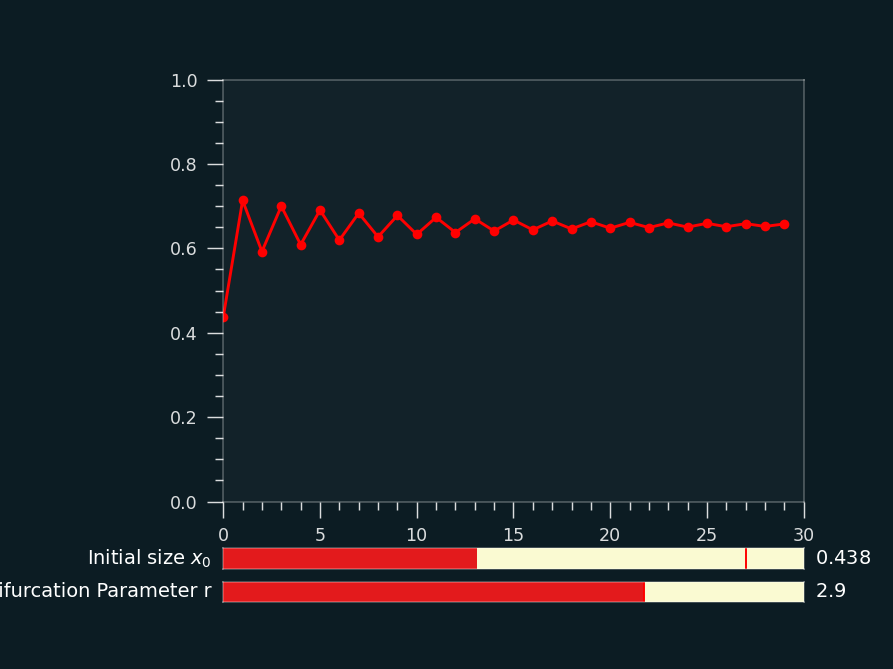

In [2]:
# Interactive Bifurcation Diagram
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from utils import logistic_interactive
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
import matplotlib.animation as animation
from qbstyles import mpl_style
from utils import step_seq, logistic_map, NaKModel, trajectory_interactive
from IPython.display import Video
mpl_style(dark=True)

# Define inital parameters
x0 = 0.9
r = 2.9

# Set up plot
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
tdata = np.arange(30)
xdata = []
xn = x0
for i in range(30):
        xdata.append(xn)
        xn = step_seq(r, xn)
line = Line2D(tdata, xdata, marker="o", linestyle="-", color="r")
ax.add_line(line)
ax.grid()
ax.set_xlim(0, 30)
ax.set_ylim(0, 1)

# Slider
ax_x0 = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_r = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_x0 = Slider(ax_x0, "Initial size $x_0$", 0, 1, valinit=x0)
slider_r = Slider(ax_r, "Bifurcation Parameter r", 0, 4, valinit=r)

# Update plot when the parameters changes
def update(val):
    xdata = []
    xn = slider_x0.val
    r = slider_r.val
    for i in range(30):
        xdata.append(xn)
        xn = step_seq(r, xn)
    line.set_ydata(xdata)
    fig.canvas.draw_idle()
    
slider_x0.on_changed(update)
slider_r.on_changed(update)

plt.show()

**Bifurcation Diagram:** Shows the values a system visits asymptotically.

<IPython.core.display.Javascript object>


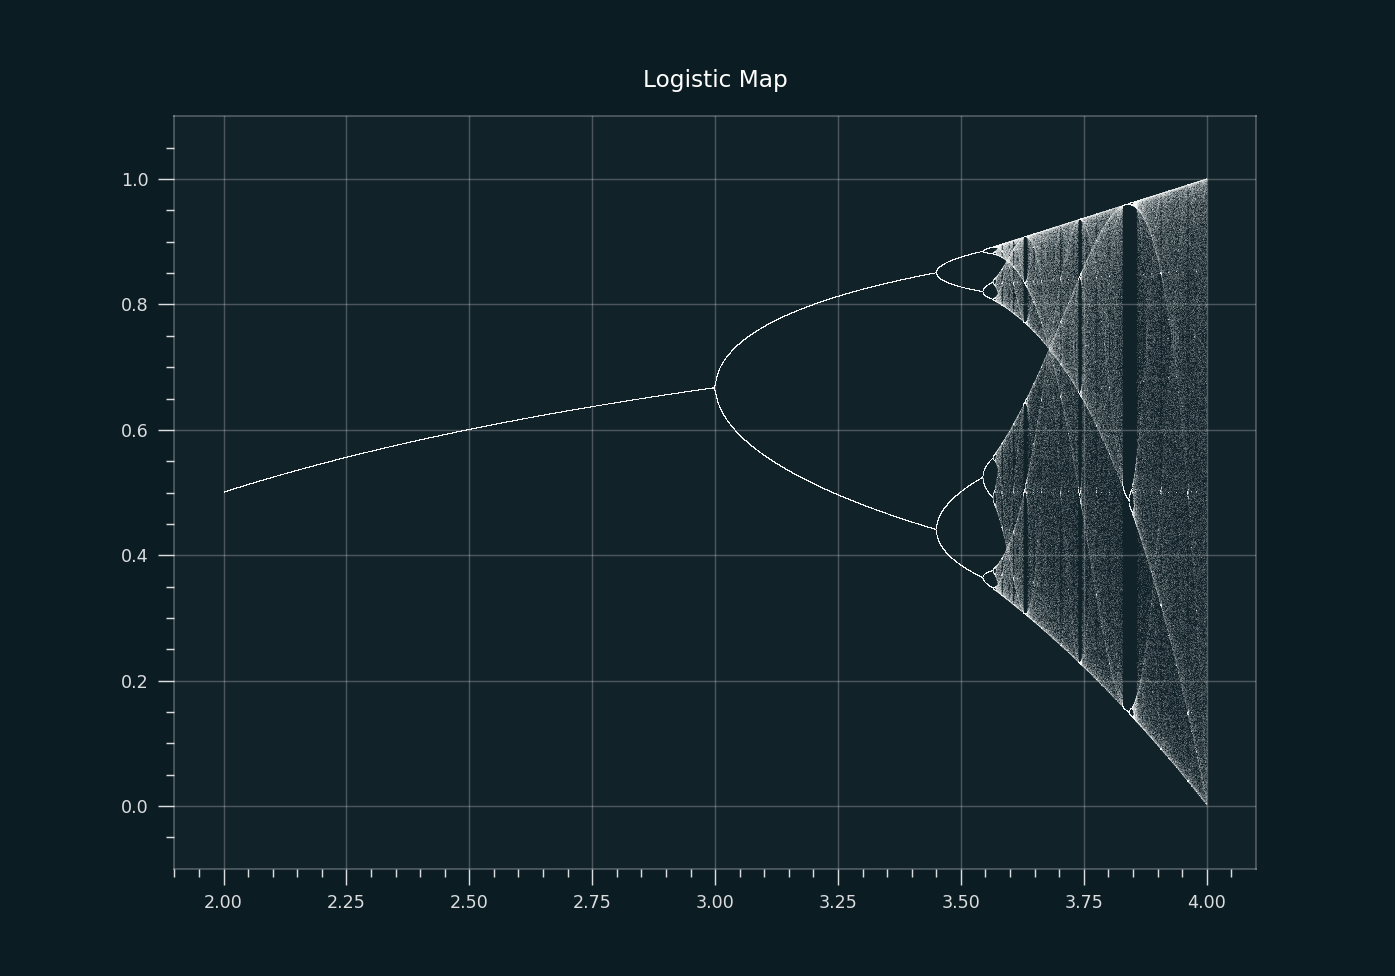

In [11]:
logistic_map()

## 2. Bifurcations and Neurodynamics
### 2.1 $I_{Na,p} + I_K$ - model

$$
\begin{aligned}
C \dot V &= \overbrace{I - g_\text{L} (V - E_\text{L})}^{\text{leak } I_L} - \overbrace{g_\text{Na} m_\infty (V)\ (V - E_\text{Na})}^{\text{instantaneous } I_{Na,p}} - \overbrace{g_\text{K} n\ (V - E_\text{K})}^{I_K}\\
\dot n &= (n_\infty (V) - n)\ /\ \tau (V)
\end{aligned}
$$

Depending on the choice of the different parameters this model can represent various neuron types.


### 2.2 Recap

**2D-system of differential equations:**  
$$
\begin{aligned}
\dot x &= f(x, y) \\
\dot y &= g(x,y)
\end{aligned}
$$

**Nullclines:**
$$
\begin{aligned}
f(x,y) &= 0 \\
g(x,y) &= 0
\end{aligned}
$$
  
**Basic types of equilibria:**  
* *Node* - unstable or stable  
* *Saddle* - always unstable  
* *Focus* - unstable or stable, cyclic trajectories in neighbourhood

<IPython.core.display.Javascript object>


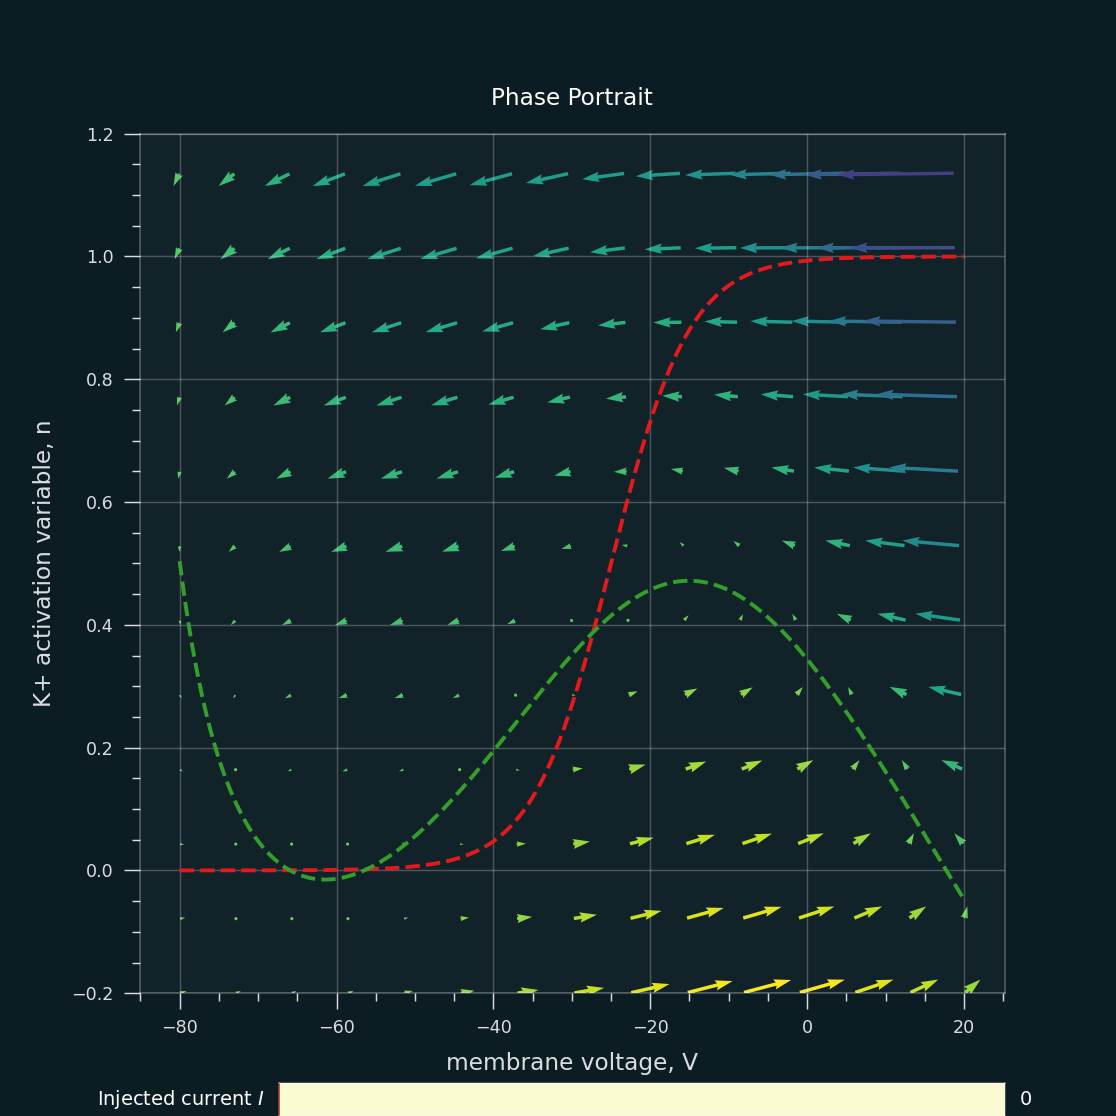

In [1]:
#Interactive phase portrait I_Na + I_K - model
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from utils import logistic_interactive
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
import matplotlib.animation as animation
from qbstyles import mpl_style
from utils import step_seq, logistic_map, NaKModel, trajectory_interactive
from IPython.display import Video
mpl_style(dark=True)
import matplotlib.pyplot as plt

low_threshold_K = False
fast_K = False
I = 0

fig, ax = plt.subplots(figsize=(8,8))

X, Y = np.meshgrid(np.linspace(-80, 20, 15), np.linspace(-.2, 1.5, 15))
x = np.linspace(-80, 20, 1000)

modelq = NaKModel(X,Y, low_threshold_K=low_threshold_K, fast_K=fast_K)
modelq.step(I = I)
U = modelq.Vdot
V = modelq.ndot
model1 = NaKModel(x, np.zeros(1000), low_threshold_K=low_threshold_K, fast_K=fast_K)
n_nullcline = model1.steady_state_n()
V_nullcline = model1.v_nullcline(I = I)

tm = ax.quiver(X, Y, U, V * 120, U)
ax.set(
    title="Phase Portrait",
    xlabel="membrane voltage, V",
    ylabel="K+ activation variable, n",
    ylim=[-0.2,1.2]
)
ax.plot(x, n_nullcline, linestyle='dashed', lw=2)
ln_V, = ax.plot(x, V_nullcline, linestyle='dashed', lw=2)

xdata, ydata = [], []
ln, = ax.plot(xdata, ydata, '-', color='lightblue')
ln1, = ax.plot([], [], 'o', color='lightcoral')

model = 0
coords = []

ax_I = plt.axes([0.25, 0, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_I = Slider(ax_I, "Injected current $I$", 0, 10, valinit=I, valstep=0.01)

# Update plot when the parameters changes
def update(val):
    V_nullcline = model1.v_nullcline(I = slider_I.val)
    ln_V.set_ydata(V_nullcline)
    X, Y = np.meshgrid(np.linspace(-80, 20, 15), np.linspace(-.2, 1.5, 15))
    global modelq
    modelq = NaKModel(X,Y, low_threshold_K=low_threshold_K, fast_K=fast_K)
    modelq.step(I = slider_I.val)
    U = modelq.Vdot
    V = modelq.ndot
    tm.set_UVC(U, V*120, U)

def animate(frame):
    if model == 0:
        pass
    else:
        xdata.append(model.V)
        ydata.append(model.n)
        model.step(I = slider_I.val)
        ln.set_data(xdata, ydata)
        ln1.set_data([xdata[-1]], [ydata[-1]])

def onclick(event):
    global coords, model, xdata, ydata

    V0, n0 = event.xdata, event.ydata
    coords.append((V0, n0))

    if len(coords) % 2 == 0:
        ln.set_data([],[])
        ln1.set_data([],[])
        model = 0
        xdata, ydata = [], []
    else:
        model = NaKModel(V0, n0, delta=.01, low_threshold_K=low_threshold_K, fast_K=fast_K)

    return coords

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()
slider_I.on_changed(update)
plt.show()
ani = FuncAnimation(fig, animate, frames=2000000, repeat=False, interval=10)
#fig, cid, ani = interactive_phase_portrait()
plt.show()


#### Bifurcation Types

**Bifurcation Parameter:** Injected Current, $I$

**Bifurcation Types:**

![](Pictures/bifurcations_neurons1.png)

### 2.1 Saddle-node on invariant circle bifurcation

A stable node equilibrium is approached by an unstable saddle, at the bifurcation point they coalesce and annihilate each other. At the point of the bifurcation an invariant circle appears and becomes a stable limit cycle after the bifurcation.

**$I_{Na,p} + I_K$ - model variation:**  
  
Model with high threshold of the voltage dependend potassium current, $I_K$.

**Neurodynamical properties of the neuron:**  
  
*Stability* - Monostable  
*Integrator* - No subthreshold oscillations

*Bifurcates at:* $I=4.51$

In [1]:
low_threshold_K = False
fast_K = False
I = 0

<IPython.core.display.Javascript object>


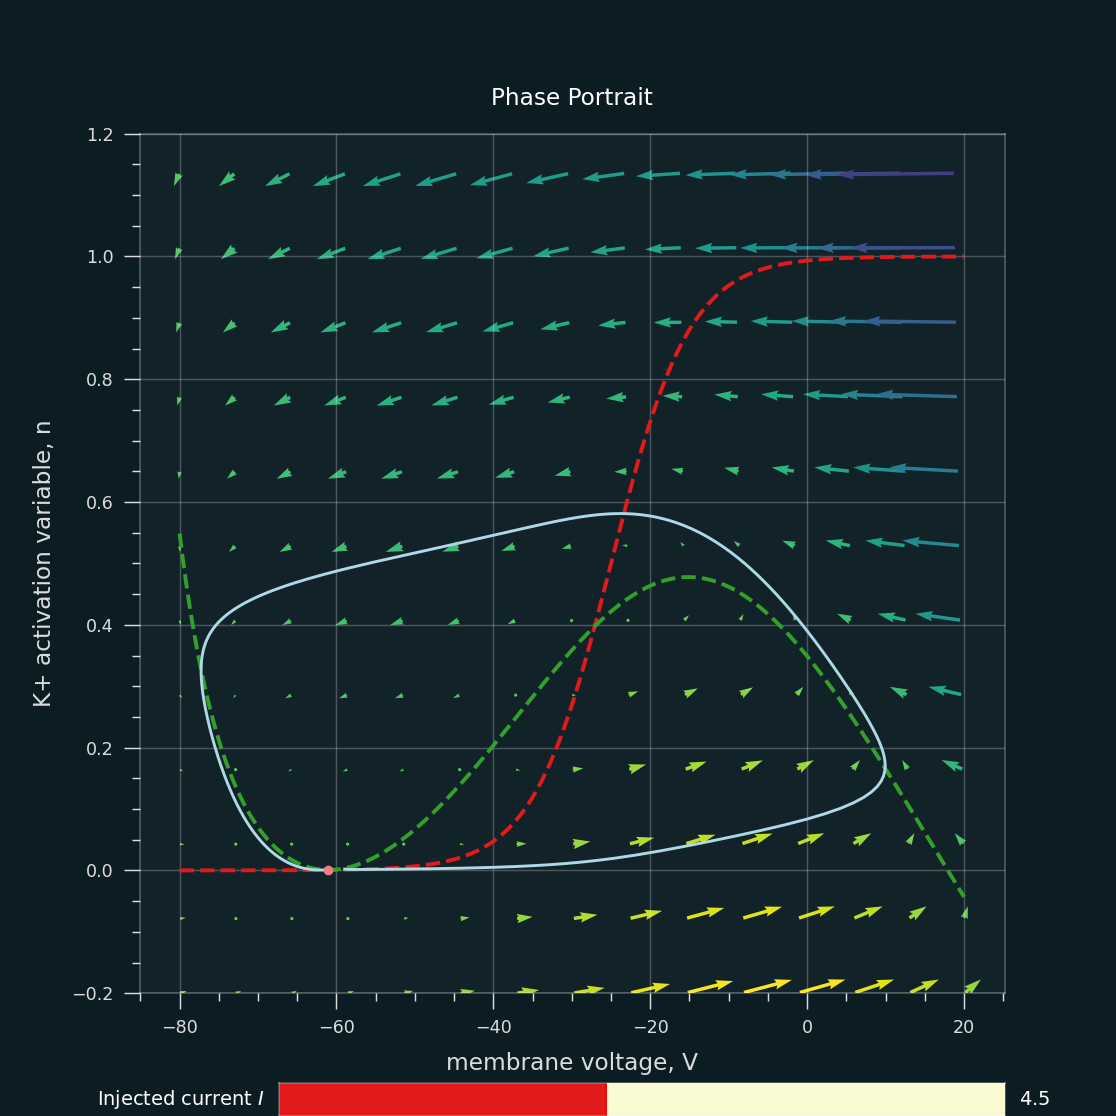

In [2]:
#Interactive phase portrait I_Na + I_K - model
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from utils import logistic_interactive
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
import matplotlib.animation as animation
from qbstyles import mpl_style
from utils import step_seq, logistic_map, NaKModel, trajectory_interactive
from IPython.display import Video
mpl_style(dark=True)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

X, Y = np.meshgrid(np.linspace(-80, 20, 15), np.linspace(-.2, 1.5, 15))
x = np.linspace(-80, 20, 1000)

modelq = NaKModel(X,Y, low_threshold_K=low_threshold_K, fast_K=fast_K)
modelq.step(I = I)
U = modelq.Vdot
V = modelq.ndot
model1 = NaKModel(x, np.zeros(1000), low_threshold_K=low_threshold_K, fast_K=fast_K)
n_nullcline = model1.steady_state_n()
V_nullcline = model1.v_nullcline(I = I)

tm = ax.quiver(X, Y, U, V * 120, U)
ax.set(
    title="Phase Portrait",
    xlabel="membrane voltage, V",
    ylabel="K+ activation variable, n",
    ylim=[-0.2,1.2]
)
ax.plot(x, n_nullcline, linestyle='dashed', lw=2)
ln_V, = ax.plot(x, V_nullcline, linestyle='dashed', lw=2)

xdata, ydata = [], []
ln, = ax.plot(xdata, ydata, '-', color='lightblue')
ln1, = ax.plot([], [], 'o', color='lightcoral')

model = 0
coords = []

ax_I = plt.axes([0.25, 0, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_I = Slider(ax_I, "Injected current $I$", 0, 10, valinit=I, valstep=0.01)

# Update plot when the parameters changes
def update(val):
    V_nullcline = model1.v_nullcline(I = slider_I.val)
    ln_V.set_ydata(V_nullcline)
    X, Y = np.meshgrid(np.linspace(-80, 20, 15), np.linspace(-.2, 1.5, 15))
    global modelq
    modelq = NaKModel(X,Y, low_threshold_K=low_threshold_K, fast_K=fast_K)
    modelq.step(I = slider_I.val)
    U = modelq.Vdot
    V = modelq.ndot
    tm.set_UVC(U, V*120, U)

def animate(frame):
    if model == 0:
        pass
    else:
        xdata.append(model.V)
        ydata.append(model.n)
        model.step(I = slider_I.val)
        ln.set_data(xdata, ydata)
        ln1.set_data([xdata[-1]], [ydata[-1]])

def onclick(event):
    global coords, model, xdata, ydata

    V0, n0 = event.xdata, event.ydata
    coords.append((V0, n0))

    if len(coords) % 2 == 0:
        ln.set_data([],[])
        ln1.set_data([],[])
        model = 0
        xdata, ydata = [], []
    else:
        model = NaKModel(V0, n0, delta=.01, low_threshold_K=low_threshold_K, fast_K=fast_K)

    return coords

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()
slider_I.on_changed(update)
plt.show()
ani = FuncAnimation(fig, animate, frames=2000000, repeat=False, interval=10)
#fig, cid, ani = interactive_phase_portrait()
plt.show()


In [8]:
Video("Animations/saddle_node_invariant_bifurcation_diagram_dark.mp4")

In [10]:
Video("Animations/saddle_node_invariant_ramp_I_dark.mp4")

In [1]:
low_threshold_K = False
fast_K = False
I = 4.51

<IPython.core.display.Javascript object>


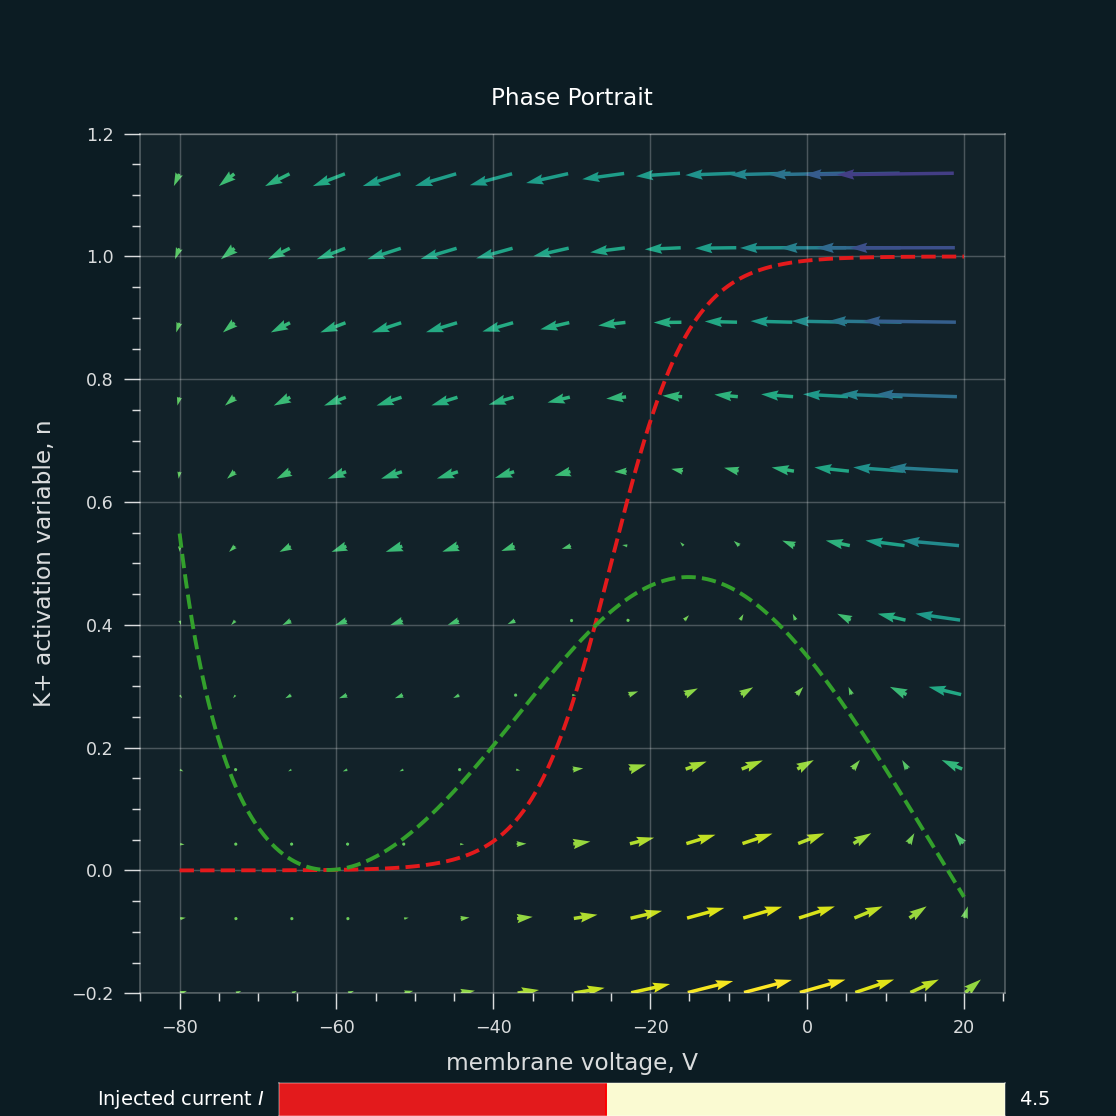

In [2]:
#Interactive phase portrait I_Na + I_K - model
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from utils import logistic_interactive
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
import matplotlib.animation as animation
from qbstyles import mpl_style
from utils import step_seq, logistic_map, NaKModel, trajectory_interactive
from IPython.display import Video
mpl_style(dark=True)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

X, Y = np.meshgrid(np.linspace(-80, 20, 15), np.linspace(-.2, 1.5, 15))
x = np.linspace(-80, 20, 1000)

modelq = NaKModel(X,Y, low_threshold_K=low_threshold_K, fast_K=fast_K)
modelq.step(I = I)
U = modelq.Vdot
V = modelq.ndot
model1 = NaKModel(x, np.zeros(1000), low_threshold_K=low_threshold_K, fast_K=fast_K)
n_nullcline = model1.steady_state_n()
V_nullcline = model1.v_nullcline(I = I)

tm = ax.quiver(X, Y, U, V * 120, U)
ax.set(
    title="Phase Portrait",
    xlabel="membrane voltage, V",
    ylabel="K+ activation variable, n",
    ylim=[-0.2,1.2]
)
ax.plot(x, n_nullcline, linestyle='dashed', lw=2)
ln_V, = ax.plot(x, V_nullcline, linestyle='dashed', lw=2)

xdata, ydata = [], []
ln, = ax.plot(xdata, ydata, '-', color='lightblue')
ln1, = ax.plot([], [], 'o', color='lightcoral')

model = 0
coords = []

ax_I = plt.axes([0.25, 0, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_I = Slider(ax_I, "Injected current $I$", 0, 10, valinit=I, valstep=0.01)

# Update plot when the parameters changes
def update(val):
    V_nullcline = model1.v_nullcline(I = slider_I.val)
    ln_V.set_ydata(V_nullcline)
    X, Y = np.meshgrid(np.linspace(-80, 20, 15), np.linspace(-.2, 1.5, 15))
    global modelq
    modelq = NaKModel(X,Y, low_threshold_K=low_threshold_K, fast_K=fast_K)
    modelq.step(I = slider_I.val)
    U = modelq.Vdot
    V = modelq.ndot
    tm.set_UVC(U, V*120, U)

def animate(frame):
    if model == 0:
        pass
    else:
        xdata.append(model.V)
        ydata.append(model.n)
        model.step(I = slider_I.val)
        ln.set_data(xdata, ydata)
        ln1.set_data([xdata[-1]], [ydata[-1]])

def onclick(event):
    global coords, model, xdata, ydata

    V0, n0 = event.xdata, event.ydata
    coords.append((V0, n0))

    if len(coords) % 2 == 0:
        ln.set_data([],[])
        ln1.set_data([],[])
        model = 0
        xdata, ydata = [], []
    else:
        model = NaKModel(V0, n0, delta=.01, low_threshold_K=low_threshold_K, fast_K=fast_K)

    return coords

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()
slider_I.on_changed(update)
plt.show()
ani = FuncAnimation(fig, animate, frames=2000000, repeat=False, interval=10)
#fig, cid, ani = interactive_phase_portrait()
plt.show()


### 2.2 Saddle-node bifurcation

A stable node equilibrium is approached by an unstable saddle, at the bifurcation point they coalesce and annihilate each other. A stable limit cycle with a focus equilibrium at its center remains. Prior to the bifurcation resting (node equilibrium) and spiking state (stable limit cycle) coexist.

**$I_{Na,p} + I_K$ - model variation:**  
  
Model with high threshold and fast activation of the voltage dependend potassium current, $I_K$.

**Neurodynamical properties of the neuron:**  
  
*Stability* - Bistable  
*Integrator* - No sub-threshold oscillations
  
*Bifurcates at:* $I=4.51$

In [2]:
low_threshold_K = False
fast_K = True
I = 0

<IPython.core.display.Javascript object>


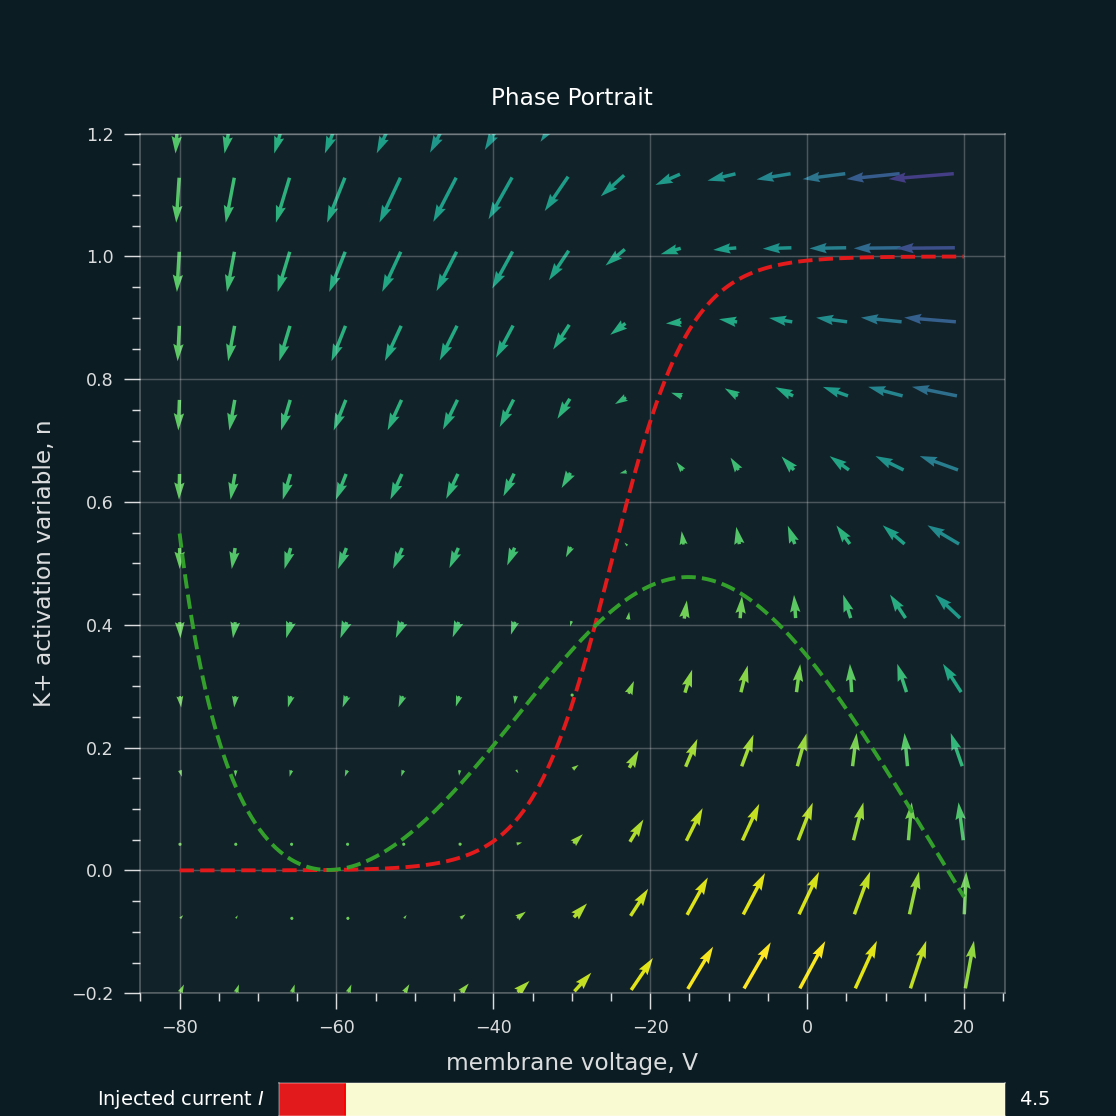

In [4]:
#Interactive phase portrait I_Na + I_K - model
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from utils import logistic_interactive
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
import matplotlib.animation as animation
from qbstyles import mpl_style
from utils import step_seq, logistic_map, NaKModel, trajectory_interactive
from IPython.display import Video
mpl_style(dark=True)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

X, Y = np.meshgrid(np.linspace(-80, 20, 15), np.linspace(-.2, 1.5, 15))
x = np.linspace(-80, 20, 1000)

modelq = NaKModel(X,Y, low_threshold_K=low_threshold_K, fast_K=fast_K)
modelq.step(I = I)
U = modelq.Vdot
V = modelq.ndot
model1 = NaKModel(x, np.zeros(1000), low_threshold_K=low_threshold_K, fast_K=fast_K)
n_nullcline = model1.steady_state_n()
V_nullcline = model1.v_nullcline(I = I)

tm = ax.quiver(X, Y, U, V * 120, U)
ax.set(
    title="Phase Portrait",
    xlabel="membrane voltage, V",
    ylabel="K+ activation variable, n",
    ylim=[-0.2,1.2]
)
ax.plot(x, n_nullcline, linestyle='dashed', lw=2)
ln_V, = ax.plot(x, V_nullcline, linestyle='dashed', lw=2)

xdata, ydata = [], []
ln, = ax.plot(xdata, ydata, '-', color='lightblue')
ln1, = ax.plot([], [], 'o', color='lightcoral')

model = 0
coords = []

ax_I = plt.axes([0.25, 0, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_I = Slider(ax_I, "Injected current $I$", 0, 50, valinit=I)

# Update plot when the parameters changes
def update(val):
    V_nullcline = model1.v_nullcline(I = slider_I.val)
    ln_V.set_ydata(V_nullcline)
    X, Y = np.meshgrid(np.linspace(-80, 20, 15), np.linspace(-.2, 1.5, 15))
    global modelq
    modelq = NaKModel(X,Y, low_threshold_K=low_threshold_K, fast_K=fast_K)
    modelq.step(I = slider_I.val)
    U = modelq.Vdot
    V = modelq.ndot
    tm.set_UVC(U, V*120, U)

def animate(frame):
    if model == 0:
        pass
    else:
        xdata.append(model.V)
        ydata.append(model.n)
        model.step(I = slider_I.val)
        ln.set_data(xdata, ydata)
        ln1.set_data([xdata[-1]], [ydata[-1]])

def onclick(event):
    global coords, model, xdata, ydata

    V0, n0 = event.xdata, event.ydata
    coords.append((V0, n0))

    if len(coords) % 2 == 0:
        ln.set_data([],[])
        ln1.set_data([],[])
        model = 0
        xdata, ydata = [], []
    else:
        model = NaKModel(V0, n0, delta=.01, low_threshold_K=low_threshold_K, fast_K=fast_K)

    return coords

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()
slider_I.on_changed(update)
plt.show()
ani = FuncAnimation(fig, animate, frames=2000000, repeat=False, interval=10)
#fig, cid, ani = interactive_phase_portrait()
plt.show()


### 2.3 Subcritical Andronov-Hopf bifurcation

A small unstable limit cycle shrinks to a stable equilibrium and makes it lose stability. The trajectory diverges from the equilibrium and approaches a spiking stable limit cycle with large amplitude.

**$I_{Na,p} + I_K$ - model variation:**  
  
Model with low threshold voltage dependend potassium current, $I_K$ and steep activation curve for the sodium current, $I_{Na}$.

**Neurodynamical properties of the neuron:**  
  
*Stability* - Monostable  
*Resonator* - Sub-threshold oscillations
  
*Bifurcates at:* $I=48.8$

![](Pictures/AH_subcritical.png)

In [1]:
low_threshold_K = True
fast_K = False
steep_Na = True
I = 44

<IPython.core.display.Javascript object>


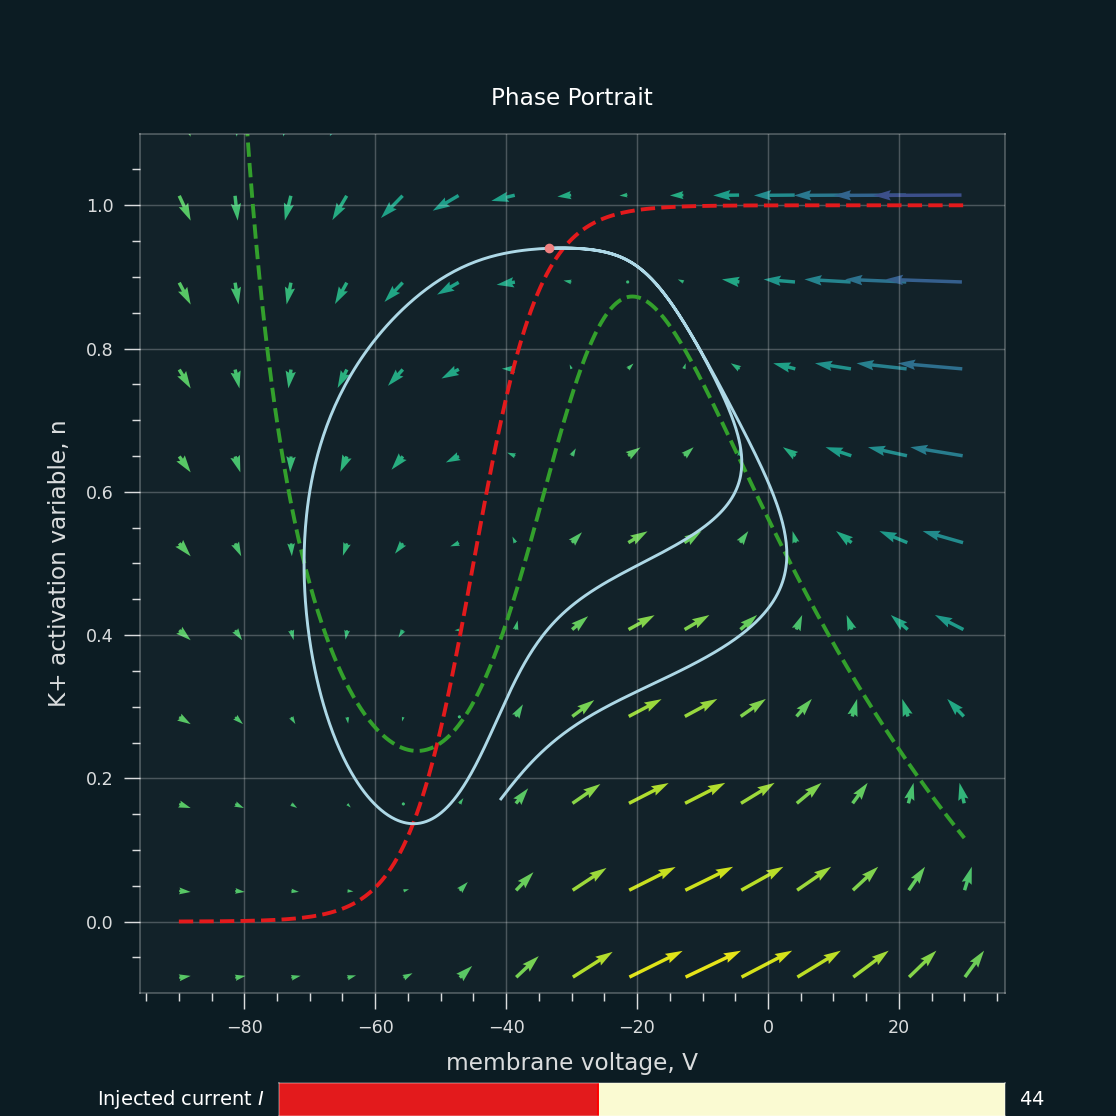

/home/jonas/Seafile/Dokumente/Studium/4_Semester/neuroinformatics/calculus_chaos_ode/utils.py:145: RuntimeWarning: divide by zero encountered in true_divide
  return (I - self.g_L * (self.V - self.E_L) - self.g_Na * self.steady_state_IV() * (self.V - self.E_Na)) / (self.g_K * (self.V - self.E_K))


In [2]:
#Interactive phase portrait I_Na + I_K - model
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from utils import logistic_interactive
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
import matplotlib.animation as animation
from qbstyles import mpl_style
from utils import step_seq, logistic_map, NaKModel, trajectory_interactive
from IPython.display import Video
mpl_style(dark=True)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

X, Y = np.meshgrid(np.linspace(-90, 30, 15), np.linspace(-.2, 1.5, 15))
x = np.linspace(-90, 30, 1000)

modelq = NaKModel(X,Y, low_threshold_K=low_threshold_K, fast_K=fast_K, steep_Na=steep_Na)
modelq.step(I = I)
U = modelq.Vdot
V = modelq.ndot
model1 = NaKModel(x, np.zeros(1000), low_threshold_K=low_threshold_K, fast_K=fast_K, steep_Na=steep_Na)
n_nullcline = model1.steady_state_n()
V_nullcline = model1.v_nullcline(I = I)

tm = ax.quiver(X, Y, U, V * 120, U)
ax.set(
    title="Phase Portrait",
    xlabel="membrane voltage, V",
    ylabel="K+ activation variable, n",
    ylim=[-0.1,1.1]
)
ax.plot(x, n_nullcline, linestyle='dashed', lw=2)
ln_V, = ax.plot(x, V_nullcline, linestyle='dashed', lw=2)

xdata, ydata = [], []
ln, = ax.plot(xdata, ydata, '-', color='lightblue')
ln1, = ax.plot([], [], 'o', color='lightcoral')

model = 0
coords = []

ax_I = plt.axes([0.25, 0, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_I = Slider(ax_I, "Injected current $I$", 0, 100, valinit=I)

# Update plot when the parameters changes
def update(val):
    V_nullcline = model1.v_nullcline(I = slider_I.val)
    ln_V.set_ydata(V_nullcline)
    X, Y = np.meshgrid(np.linspace(-80, 20, 15), np.linspace(-.1, 1.5, 15))
    global modelq
    modelq = NaKModel(X,Y, low_threshold_K=low_threshold_K, fast_K=fast_K, steep_Na=steep_Na)
    modelq.step(I = slider_I.val)
    U = modelq.Vdot
    V = modelq.ndot
    tm.set_UVC(U, V*120, U)

def animate(frame):
    if model == 0:
        pass
    else:
        xdata.append(model.V)
        ydata.append(model.n)
        model.step(I = slider_I.val)
        ln.set_data(xdata, ydata)
        ln1.set_data([xdata[-1]], [ydata[-1]])

def onclick(event):
    global coords, model, xdata, ydata

    V0, n0 = event.xdata, event.ydata
    coords.append((V0, n0))

    if len(coords) % 2 == 0:
        ln.set_data([],[])
        ln1.set_data([],[])
        model = 0
        xdata, ydata = [], []
    else:
        model = NaKModel(V0, n0, delta=.01, low_threshold_K=low_threshold_K, fast_K=fast_K, steep_Na=steep_Na)

    return coords

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()
slider_I.on_changed(update)
plt.show()
ani = FuncAnimation(fig, animate, frames=2000000, repeat=False, interval=10)
#fig, cid, ani = interactive_phase_portrait()
plt.show()


### 3.4 Supercritical Andronov-Hopf

The stable equilibrium loses stability and a stable limit cycle with small amplitude appears. As
the magnitude of the injected current increases, the amplitude of the limit cycle increases.

**$I_{Na,p} + I_K$ - model variation:**  
  
Model with low threshold voltage dependend potassium current, $I_K$ and steep activation curve for the sodium current, $I_{NA}$.

**Neurodynamical properties of the neuron:**  
  
*Stability* - Bistable  
*Resonator* - Sub-threshold oscillations
  
*Bifurcates at:* $I=14.66$

![](Pictures/AH_supercritical.png)

In [1]:
low_threshold_K = True
fast_K = False
steep_Na = False
I = 0

<IPython.core.display.Javascript object>


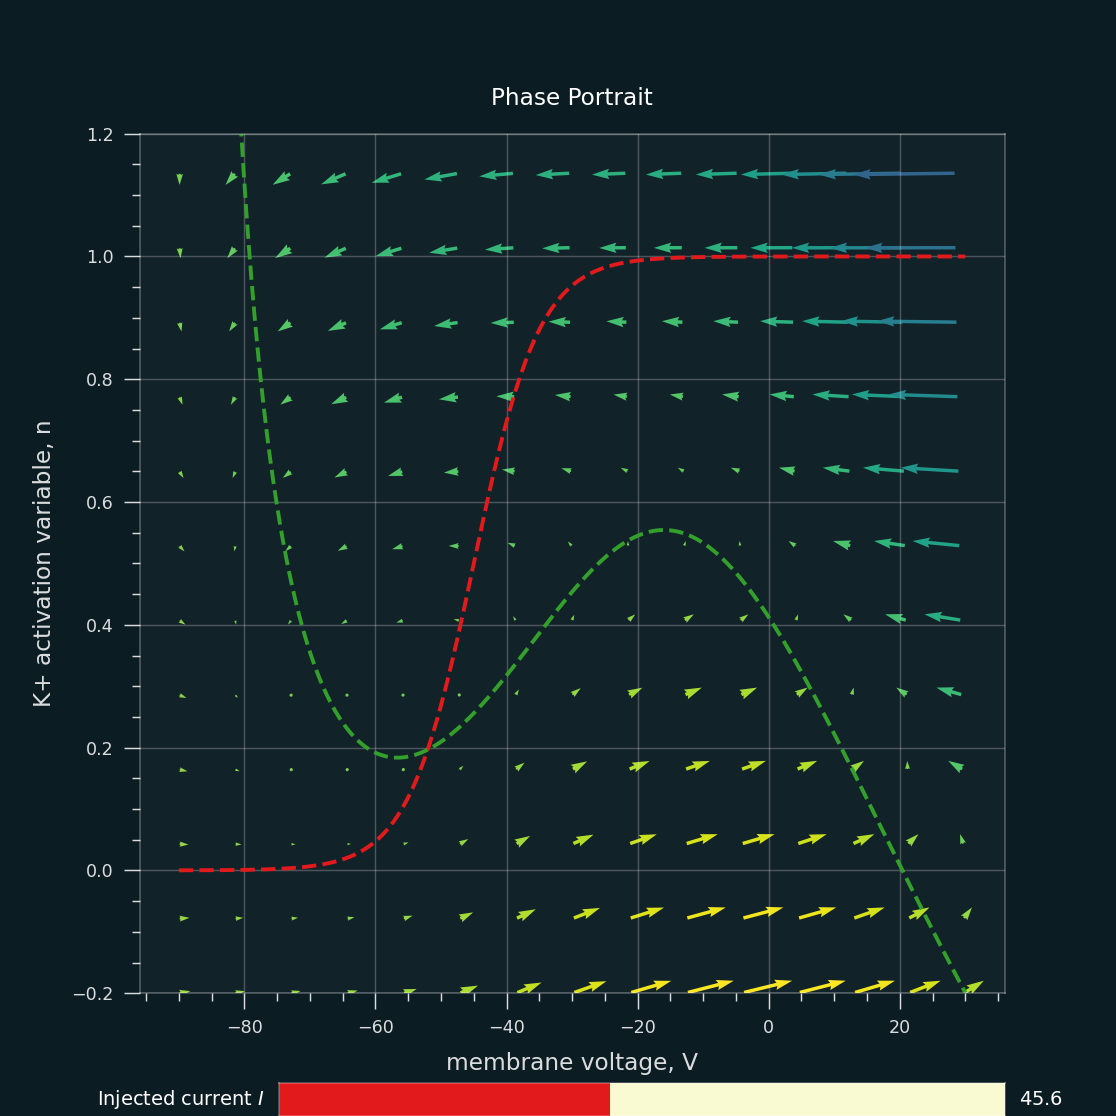

/home/jonas/Seafile/Dokumente/Studium/4_Semester/neuroinformatics/calculus_chaos_ode/utils.py:145: RuntimeWarning: divide by zero encountered in true_divide
  return (I - self.g_L * (self.V - self.E_L) - self.g_Na * self.steady_state_IV() * (self.V - self.E_Na)) / (self.g_K * (self.V - self.E_K))


In [2]:
#Interactive phase portrait I_Na + I_K - model
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from utils import logistic_interactive
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
import matplotlib.animation as animation
from qbstyles import mpl_style
from utils import step_seq, logistic_map, NaKModel, trajectory_interactive
from IPython.display import Video
mpl_style(dark=True)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

X, Y = np.meshgrid(np.linspace(-90, 30, 15), np.linspace(-.2, 1.5, 15))
x = np.linspace(-90, 30, 1000)

modelq = NaKModel(X,Y, low_threshold_K=low_threshold_K, fast_K=fast_K, steep_Na=steep_Na)
modelq.step(I = I)
U = modelq.Vdot
V = modelq.ndot
model1 = NaKModel(x, np.zeros(1000), low_threshold_K=low_threshold_K, fast_K=fast_K, steep_Na=steep_Na)
n_nullcline = model1.steady_state_n()
V_nullcline = model1.v_nullcline(I = I)

tm = ax.quiver(X, Y, U, V * 120, U)
ax.set(
    title="Phase Portrait",
    xlabel="membrane voltage, V",
    ylabel="K+ activation variable, n",
    ylim=[-0.2,1.2]
)
ax.plot(x, n_nullcline, linestyle='dashed', lw=2)
ln_V, = ax.plot(x, V_nullcline, linestyle='dashed', lw=2)

xdata, ydata = [], []
ln, = ax.plot(xdata, ydata, '-', color='lightblue')
ln1, = ax.plot([], [], 'o', color='lightcoral')

model = 0
coords = []

ax_I = plt.axes([0.25, 0, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_I = Slider(ax_I, "Injected current $I$", 0, 100, valinit=I)

# Update plot when the parameters changes
def update(val):
    V_nullcline = model1.v_nullcline(I = slider_I.val)
    ln_V.set_ydata(V_nullcline)
    X, Y = np.meshgrid(np.linspace(-80, 20, 15), np.linspace(-.2, 1.5, 15))
    global modelq
    modelq = NaKModel(X,Y, low_threshold_K=low_threshold_K, fast_K=fast_K, steep_Na=steep_Na)
    modelq.step(I = slider_I.val)
    U = modelq.Vdot
    V = modelq.ndot
    tm.set_UVC(U, V*120, U)

def animate(frame):
    if model == 0:
        pass
    else:
        xdata.append(model.V)
        ydata.append(model.n)
        model.step(I = slider_I.val)
        ln.set_data(xdata, ydata)
        ln1.set_data([xdata[-1]], [ydata[-1]])

def onclick(event):
    global coords, model, xdata, ydata

    V0, n0 = event.xdata, event.ydata
    coords.append((V0, n0))

    if len(coords) % 2 == 0:
        ln.set_data([],[])
        ln1.set_data([],[])
        model = 0
        xdata, ydata = [], []
    else:
        model = NaKModel(V0, n0, delta=.01, low_threshold_K=low_threshold_K, fast_K=fast_K, steep_Na=steep_Na)

    return coords

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()
slider_I.on_changed(update)
plt.show()
ani = FuncAnimation(fig, animate, frames=2000000, repeat=False, interval=10)
#fig, cid, ani = interactive_phase_portrait()
plt.show()


### 3. References

1. Izhikevich, Eugene M. *Dynamical systems in neuroscience*. MIT press, 2007.
2. Logistic map. (2001). Wikipedia. Retrieved 20 August, 2020, from https://en.wikipedia.org/wiki/Logistic_map